In [38]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import requests
from itertools import zip_longest

%matplotlib inline

In [39]:
# helper functions 

# moving average function
def ma(x,n):
    cs = list(np.cumsum(x))
    return [ (x-y)/n for (x,y) in zip(cs, [0]*n + cs[:-n])]

# group a list into sublists of length n
def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

# Return a list of ratios between successive numbers in a list
def ratio(d):
    return [x/y for (x,y) in zip(d[1:],d[:-1])] 
    # return([1 if y == 0 else x/y for (x,y) in zip(d[1:],d[:-1])])
    # return [1]*n + [1 if y == 0 else x/y for (x,y) in zip(d[n:],d[:-n])]

In [40]:
# get some data on cumulative deaths
url = "https://api.covid19uk.live/historyfigures"
data = requests.get(url=url).json()['data']

In [41]:
# field = "confirmed"
field = 'death'
totdeaths = [d[field] for d in data if d[field] > 60] # start after deaths  > 60
# calculate the daily deaths from the diffs
dailydeaths = [totdeaths[0]] + [ a - b  for  (a,b) in zip (totdeaths[1:], totdeaths[:-1])]

#hack
#dailydeaths[-6] = 111
#dailydeaths = dailydeaths + [357]

# smooth out the dailydeaths by moving average over 7 days
smoothed_dailydeaths = list(ma(dailydeaths, 7))

In [42]:
print(totdeaths[-14:])
print (dailydeaths[-14:-7],dailydeaths[-7:])
print(sum(dailydeaths[-14:-7])/7, sum(dailydeaths[-7:])/7)
print (sum(dailydeaths[-7:])/sum(dailydeaths[-14:-7]))

[37460, 37837, 38161, 38376, 38489, 39045, 39369, 39728, 39904, 40261, 40465, 40542, 40597, 40883]
[412, 377, 324, 215, 113, 556, 324] [359, 176, 357, 204, 77, 55, 286]
331.57142857142856 216.28571428571428
0.6523050409306334


In [43]:
def get_weeklydeaths(deaths):
    # group the deaths into chunks 7 days long, pad at the end with the average of last 7 days number
    return list(map(sum,  grouper(deaths, 7, sum(deaths[-7:])/7)))
    
def r(weeklydeaths):  
    # week on week ratio of weekly deaths
    return ratio(weeklydeaths)

In [44]:
weeklydeaths = get_weeklydeaths(dailydeaths)
rdata = r(weeklydeaths)
print(len(dailydeaths)//7, "Weeks and", len(dailydeaths)%7, "days")

print("Weeks after 60 deaths:", "R")
for rval in rdata:
    print("Week " + str(rdata.index(rval) + 1) + ":", rval)

12 Weeks and 1 days
Weeks after 60 deaths: R
Week 1: 4.856140350877193
Week 2: 3.031791907514451
Week 3: 1.5300285986653956
Week 4: 0.9668224299065421
Week 5: 0.8962461736748832
Week 6: 0.7893223081071364
Week 7: 0.8241858346618083
Week 8: 0.7546283503730312
Week 9: 0.7755400952032223
Week 10: 1.006137865911237
Week 11: 0.7282965743782261
Week 12: 1.0204344624447717


Text(0, 0.5, 'death per day')

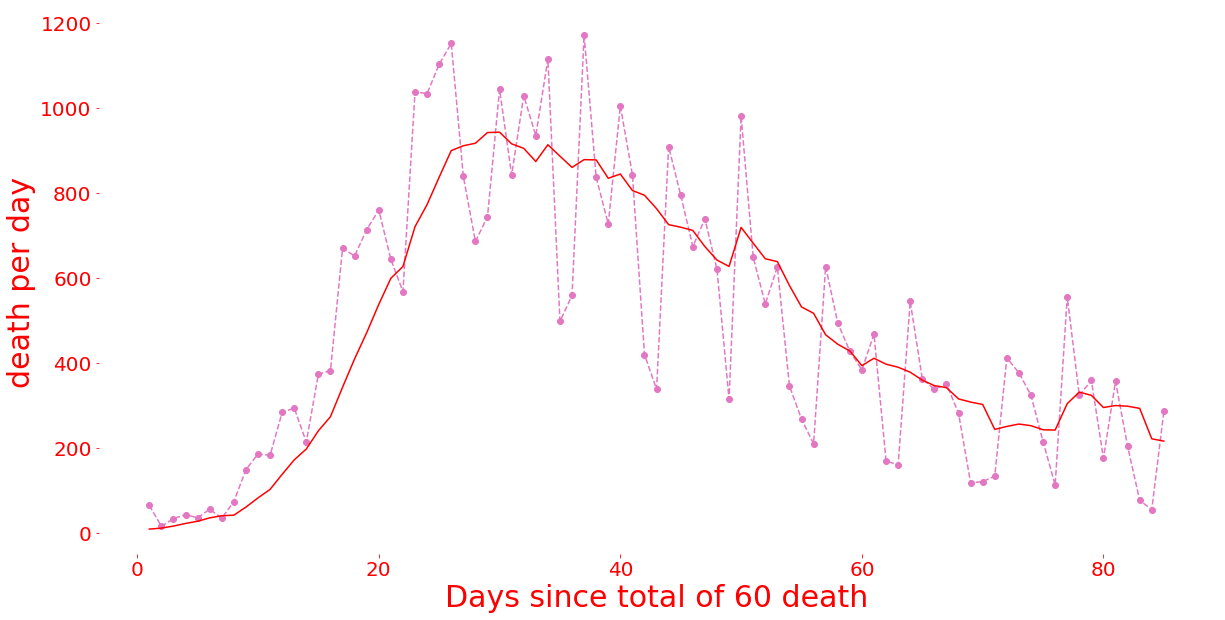

In [45]:
# Draw some pictures
rx = np.linspace(1, len(rdata), len(rdata))

# fig, ax1 = plt.subplots(1, figsize=(10, 8))

fig=plt.figure(figsize=(20, 10))

#ax1=fig.add_subplot(111, label="1")
#ax1.plot(rx,rdata,color="g")
#ax1.tick_params(axis='x', colors="g")
#ax1.tick_params(axis='y', colors="g",labelsize=20)
# ax1.set_xlabel(['Weeks since first death'], color="g",fontsize=30) 
#ax1.set_ylabel('R Factor', color="g", fontsize=30)  
#ax1.yaxis.set_label_position('right')
#ax1.xaxis.tick_top()
#ax1.yaxis.tick_right()
#ax1.set_ylim(bottom=0)


x = np.linspace(1, len(dailydeaths), len(dailydeaths))
ax2=fig.add_subplot(111, frame_on=False, label="2")
ax2.plot(x, dailydeaths, 'o--k',color="C6")
ax2.plot(x, smoothed_dailydeaths,color="r")
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
ax2.xaxis.set_label_position('bottom') 
ax2.yaxis.set_label_position('left') 
ax2.tick_params(axis='x', colors="r",labelsize=20)
ax2.tick_params(axis='y', colors="r", labelsize=20)
ax2.set_xlabel('Days since total of 60 ' + field, color="r", fontsize=30) 
ax2.set_ylabel(field + ' per day', color="r", fontsize=30)       
# ax2 = ax1.twinx() 

Text(0, 0.5, 'death per week')

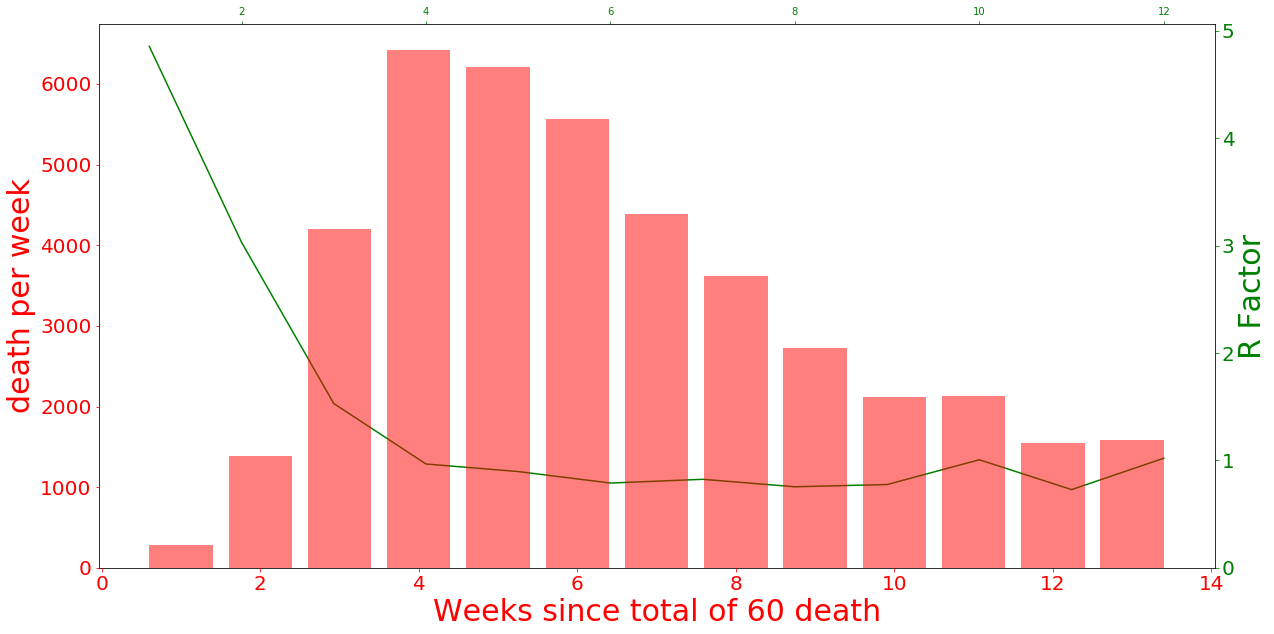

In [46]:
rx = np.linspace(1, len(rdata), len(rdata))

# fig, ax1 = plt.subplots(1, figsize=(10, 8))

fig=plt.figure(figsize=(20, 10))

ax1=fig.add_subplot(111, label="1",)
ax1.plot(rx,rdata,color="g")
ax1.tick_params(axis='x', colors="g")
ax1.tick_params(axis='y', colors="g",labelsize=20)
ax1.set_ylabel('R Factor', color="g", fontsize=30)  
ax1.yaxis.set_label_position('right')
ax1.xaxis.tick_top()
ax1.yaxis.tick_right()
ax1.set_ylim(bottom=0)

x = np.linspace(1, len(weeklydeaths), len(weeklydeaths))
ax2=fig.add_subplot(111, frame_on=False, label="2")
ax2.bar(x, weeklydeaths, fc=(1, 0, 0, 0.5))
# ax2.plot(x, smoothed_dailydeaths,color="r")
ax2.xaxis.tick_bottom()
ax2.yaxis.tick_left()
ax2.xaxis.set_label_position('bottom') 
ax2.yaxis.set_label_position('left') 
ax2.tick_params(axis='x', colors="r",labelsize=20)
ax2.tick_params(axis='y', colors="r", labelsize=20)
ax2.set_xlabel('Weeks since total of 60 ' + field, color="r", fontsize=30) 
ax2.set_ylabel(field + ' per week', color="r", fontsize=30) 




In [47]:
# estimate next weeks deaths from current R

nextWeeksDeaths = sum(dailydeaths[-7:]) * rdata[-1]

print("Next Weeks Deaths: ", nextWeeksDeaths)

Next Weeks Deaths:  1544.9377761413843


In [48]:
totdeaths[-14:]

[37460,
 37837,
 38161,
 38376,
 38489,
 39045,
 39369,
 39728,
 39904,
 40261,
 40465,
 40542,
 40597,
 40883]

In [49]:
totdeaths[-15:-7]
print(totdeaths[-15])
print(totdeaths[-8])

37048
39369


In [50]:
totdeaths[-7:]

[39728, 39904, 40261, 40465, 40542, 40597, 40883]

In [51]:
for i in range(0,5):
    print (i,-i*7 - 1, -(i+1)*7 -1) 
    print(totdeaths[-i*7 - 1] - totdeaths[-(i+1)*7 -1])
    # print(totdeaths)

0 -1 -8
1514
1 -8 -15
2321
2 -15 -22
1707
3 -22 -29
2649
4 -29 -36
3265
